In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
# Taking input of data manually -> y = 0.8x^2 + 0.9x + 2
X = 6*np.random.rand(200,1) - 3
y = 0.8 * X**2 +0.9*X +2 + np.random.randn(200,1)

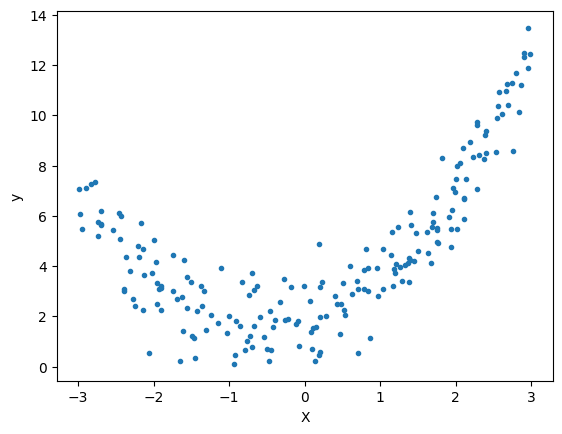

In [6]:
plt.plot(X,y,'.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


### Applying linear regression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred) * 100

14.543277882191841

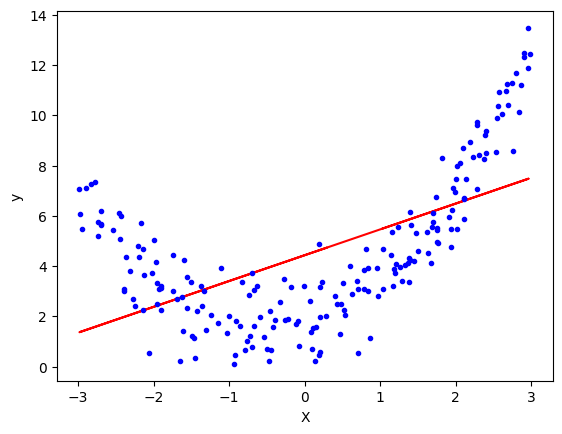

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
# It is seen that the line is not best fit

### Applying Polynomial regression

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [15]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = lr.predict(X_test_trans)


In [19]:
r2_score(y_test,y_pred) *100
# polynomial use korar karone accuracy barse

84.8669611714441

In [22]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

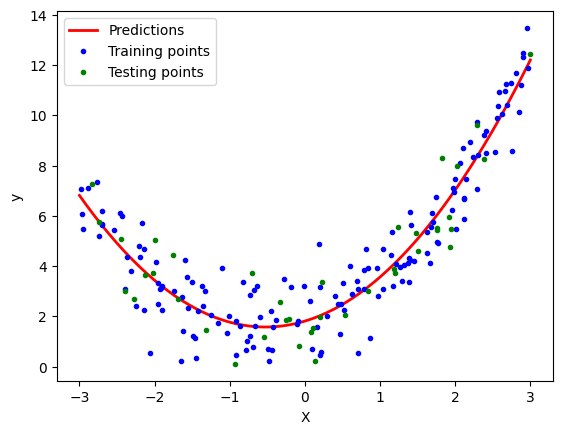

In [25]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()